<a href="https://colab.research.google.com/github/ToaiDinh/ANN_AI/blob/main/ANN_Robot3DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv

url = 'drive/MyDrive/data_training/robot_3dof/robot_3dof.csv'
step = np.pi/50
l1 = 50
l2 = 40
l3 = 20

arr_1 = np.arange(step,2*np.pi+step,step)
arr_2 = np.arange(step,np.pi+step,step)
arr_3 = np.arange(-np.pi+step,np.pi+step,step)
angle = np.array([[0,0,0]])
p = np.array([[110,0,0]])
header = ['Position_x','Position_y','Phi','Theta_1','Theta_2','Theta_3']
with open(url,'w') as file:
  writer = csv.writer(file)
  writer.writerow(header);
  for i in arr_1:
    for j in arr_2:
      for k in arr_3:
        angle = np.concatenate((angle,[[i,j,k]]),axis=0)
        px = l1*np.cos(i)+l2*np.cos(i+j)+l3*np.cos(i+j+k)
        py = l1*np.sin(i)+l2*np.sin(i+j)+l3*np.sin(i+j+k)
        phi = i + j + k
        p = np.concatenate((p,[[px,py,phi]]),axis=0)
        data = [px,py,phi,i,j,k]
        writer.writerow(data)
file.close()
print(angle.shape)
print(p.shape)

(500001, 3)
(500001, 3)


In [ ]:
print("Max Px: ",np.max(p[:,0]))
print("Min Px: ",np.min(p[:,0]))
print("Max Py: ",np.max(p[:,1]))
print("Min Py: ",np.min(p[:,1]))
print("Max Phi: ",np.max(p[:,2]))
print("Min Phi: ",np.min(p[:,2]))
print("Max Theta 1: ",np.max(angle[:,0]))
print("Min Theta 1: ",np.min(angle[:,0]))
print("Max Theta 2: ",np.max(angle[:,1]))
print("Min Theta 2: ",np.min(angle[:,1]))
print("Max Theta 3: ",np.max(angle[:,2]))
print("Min Theta 3: ",np.min(angle[:,2]))

Max Px:  110.0
Min Px:  -109.92106913713087
Max Py:  109.92106913713087
Min Py:  -109.92106913713087
Max Phi:  12.566370614359181
Min Phi:  -2.9530970943744053
Max Theta 1:  6.283185307179586
Min Theta 1:  0.0
Max Theta 2:  3.1415926535897936
Min Theta 2:  0.0
Max Theta 3:  3.1415926535898024
Min Theta 3:  -3.078760800517997


In [ ]:
pos = p.copy()
ang = angle.copy()
print(pos)
print(ang)

[[ 1.10000000e+02  0.00000000e+00  0.00000000e+00]
 [ 6.99401795e+01  4.40522903e+00 -2.95309709e+00]
 [ 7.02142613e+01  3.17905758e+00 -2.89026524e+00]
 ...
 [ 2.98422940e+01 -2.50666467e+00  1.24407069e+01]
 [ 2.99605346e+01 -1.25581039e+00  1.25035388e+01]
 [ 3.00000000e+01  1.70287803e-13  1.25663706e+01]]
[[ 0.          0.          0.        ]
 [ 0.06283185  0.06283185 -3.0787608 ]
 [ 0.06283185  0.06283185 -3.01592895]
 ...
 [ 6.28318531  3.14159265  3.01592895]
 [ 6.28318531  3.14159265  3.0787608 ]
 [ 6.28318531  3.14159265  3.14159265]]


In [ ]:
pos[:,0:2] = (pos[:,0:2]+110)/220
min_phi = np.min(pos[:,2])
max_phi = np.max(pos[:,2])
pos[:,2] = (pos[:,2]-min_phi)/(max_phi-min_phi)
ang[:,0] /= 2*np.pi
ang[:,1] /= np.pi
ang[:,2] = (ang[:,2]+np.pi)/(2*np.pi)

In [ ]:
print("Max Px: ",np.max(pos[:,0]))
print("Min Px: ",np.min(pos[:,0]))
print("Max Py: ",np.max(pos[:,1]))
print("Min Py: ",np.min(pos[:,1]))
print("Max Phi: ",np.max(pos[:,2]))
print("Min Phi: ",np.min(pos[:,2]))
print("Max Theta 1: ",np.max(ang[:,0]))
print("Min Theta 1: ",np.min(ang[:,0]))
print("Max Theta 2: ",np.max(ang[:,1]))
print("Min Theta 2: ",np.min(ang[:,1]))
print("Max Theta 3: ",np.max(ang[:,2]))
print("Min Theta 3: ",np.min(ang[:,2]))

Max Px:  1.0
Min Px:  0.00035877664940513074
Max Py:  0.9996412233505949
Min Py:  0.00035877664940513074
Max Phi:  1.0
Min Phi:  0.0
Max Theta 1:  1.0
Min Theta 1:  0.0
Max Theta 2:  1.0000000000000002
Min Theta 2:  0.0
Max Theta 3:  1.0000000000000013
Min Theta 3:  0.010000000000000014


In [ ]:

"""
p[:,0:2] = (p[:,0:2]+110)/220
p[:,2] = (p[:,2]+np.pi)/(2*np.pi)
angle[0:,0] /= 2*np.pi
angle[0:,1] /= np.pi
angle[0:,2] = (angle[0:,2]+np.pi)/(2*np.pi)
"""

In [ ]:
print(np.max(angle[0:,2]))
print(np.min(angle[0:,2]))
print(np.max(p))
print(np.min(p))

1.0000000000000013
0.010000000000000014
2.5000000000000013
0.00035877664940513074


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,StandardScaler

x_train,x_test,y_train,y_test = train_test_split(pos,ang,test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(100,kernel_initializer='normal',activation='relu',input_shape=(3,)))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 64)                5184      
                                                                 
 dense_3 (Dense)             (None, 30)                1950      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 15,957
Trainable params: 15,957
Non-traina

Epoch 1/15
10000/10000 [==============================] - 28s 3ms/step - loss: 0.0077 - accuracy: 0.8810 - val_loss: 0.0017 - val_accuracy: 0.9488
Epoch 2/15
10000/10000 [==============================] - 27s 3ms/step - loss: 0.0024 - accuracy: 0.9395 - val_loss: 0.0014 - val_accuracy: 0.9440
Epoch 3/15
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0018 - accuracy: 0.9503 - val_loss: 0.0013 - val_accuracy: 0.9630
Epoch 4/15
10000/10000 [==============================] - 23s 2ms/step - loss: 0.0015 - accuracy: 0.9561 - val_loss: 6.7539e-04 - val_accuracy: 0.9677
Epoch 5/15
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0014 - accuracy: 0.9600 - val_loss: 0.0017 - val_accuracy: 0.9510
Epoch 6/15
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0012 - accuracy: 0.9616 - val_loss: 0.0013 - val_accuracy: 0.9541
Epoch 7/15
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0011 - accuracy: 0.9635 - val_los

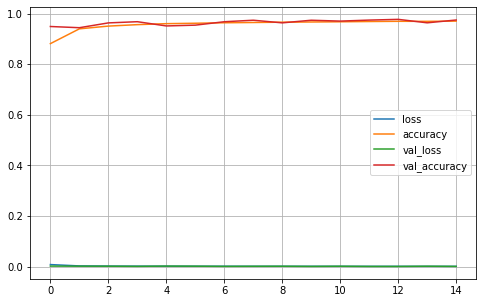

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


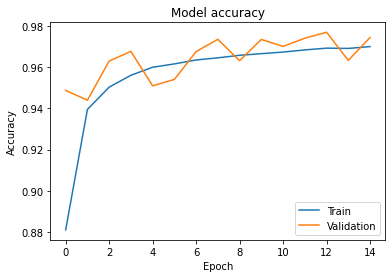

In [ ]:
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=32,epochs=15,verbose=1,validation_split=0.2)
score = model.evaluate(x_test,y_test,verbose=0)
print("Error: ",score[0])
print("Accuracy: ",score[1])
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

In [ ]:
model_json = model.to_json()
with open('drive/MyDrive/data_training/robot_3dof/robot_3dof_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/data_training/robot_3dof/robot_3dof_weights.h5')

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[[0.5522962  0.20900871 0.38942677]
 [0.50676394 0.27392042 0.7100945 ]
 [0.64709127 0.7052063  0.49588716]
 ...
 [0.24441922 0.66605467 0.99043274]
 [0.7160154  0.8594855  0.0153164 ]
 [0.28931102 0.72600245 0.5076531 ]]
[[0.55 0.22 0.38]
 [0.52 0.28 0.7 ]
 [0.65 0.72 0.49]
 ...
 [0.24 0.68 0.99]
 [0.7  0.86 0.02]
 [0.29 0.72 0.52]]


In [ ]:
test = np.array([[50,60,np.pi/3]])
print("Test value ")
print("Px = ",test[0][0],"\nPy = ",test[0][1],"\nPhi = ",test[0][2])
test[:,0:2] = (test[:,0:2]+110)/220
test[:,2] = (test[:,2]-min_phi)/(max_phi-min_phi)
print(test)
y_ = model.predict(test)
t1 = y_[0][0]*2*np.pi
t2 = y_[0][1]*np.pi
t3 = y_[0][2]*2*np.pi - np.pi
_x = l1*np.cos(t1)+l2*np.cos(t1+t2)+l3*np.cos(t1+t2+t3)
_y = l1*np.sin(t1)+l2*np.sin(t1+t2)+l3*np.sin(t1+t2+t3)
_phi = t1 + t2 + t3
print("=> ","Theta 1 = ",t1,"\n    Theta 2 = ",t2,"\n    Theta 3 = ",t3)
print("Result when substitute predict angle to FK: \nPx = ",_x,"\nPy = ",_y,"\nphi = ",_phi)

Test value 
Px =  50.0 
Py =  60.0 
Phi =  1.0471975511965976
[[0.72727273 0.77272727 0.25775978]]
=>  Theta 1 =  0.12643872222315086 
    Theta 2 =  1.7719592192253866 
    Theta 3 =  -0.8821059897923078
Result when substitute predict angle to FK: 
Px =  47.26037849952488 
Py =  61.18100715203663 
phi =  1.0162919516562297


In [ ]:
from google.colab import files
upload1 = files.upload()
upload2 = files.upload()

Saving robot_3dof_config.json to robot_3dof_config.json


Saving robot_3dof_weights.h5 to robot_3dof_weights.h5


In [ ]:
from keras.models import model_from_json
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np


model_architect = 'robot_3dof_config.json'
model_weights = 'robot_3dof_weights.h5'
model_ = model_from_json(open(model_architect).read())
model_.load_weights(model_weights)
model_.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
test = np.array([[93.3335507657071,-11.4928896955359,-1.3823007675795]])
print("Test value ")
print("Px = ",test[0][0],"\nPy = ",test[0][1],"\nPhi = ",test[0][2])
test = (test+110)/220
y_ = model_.predict(test)
t1 = y_[0][0]*2*np.pi
t2 = y_[0][1]*np.pi
t3 = y_[0][2]*np.pi - np.pi/2
_x = l1*np.cos(t1)+l2*np.cos(t1+t2)+l3*np.cos(t1+t2+t3)
_y = l1*np.sin(t1)+l2*np.sin(t1+t2)+l3*np.sin(t1+t2+t3)
_phi = t1 + t2 + t3
print("=> ","Theta 1 = ",t1,"\n    Theta 2 = ",t2,"\n    Theta 3 = ",t3)
print("Result when substitute predict angle to FK: \nPx = ",_x,"\nPy = ",_y,"\nphi = ",_phi)

Test value 
Px =  93.3335507657071 
Py =  -11.4928896955359 
Phi =  -1.3823007675795
=>  Theta 1 =  0.3844097431345003 
    Theta 2 =  0.08228630974937627 
    Theta 3 =  -0.8896089104104964
Result when substitute predict angle to FK: 
Px =  100.31133304723971 
Py =  28.53975773839526 
phi =  -0.4229128575266198
